In [5]:
import CalculatedFieldSubroutines as cfs

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from pandasgui import show

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

In [6]:
warnings.filterwarnings( 'ignore' )

In [7]:
gmID_list = cfs.list_whitelisted_gmIDs()

topic_list = cfs.list_topics()

print( topic_list )

['/apollo/drive/event', '/apollo/perception/traffic/light', '/apollo/canbus/chassis', '/apollo/sensor/gnss/best/pose']


In [8]:
red_combined_dfs = []

for gmID in gmID_list:

    if ( cfs.give_route( gmID ) != 'Red' ):

        continue

    chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    chassis_df.sort_values( 'time' )

    best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( chassis_df )

    cfs.TernaryDrivingModeTransition( chassis_df )

    cfs.DistanceToNearestDisengagement( chassis_df )

    #

    cfs.LatLonTotalStdDev( best_pose_df )

    cfs.ProgressAlongRoute_v2( best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( chassis_df, best_pose_df )

    #

    red_combined_df = pd.merge( chassis_df, best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    #

    red_combined_df = red_combined_df[ [ 'brakePercentage', 'speedMps', 'time_x', 'throttlePercentage', 'steeringPercentage', \
                                 'TernaryDrivingModeTransition', 'DistanceToNearestDisengagement', 'longitude', 'latitude', \
                                 'LatLonTotalStdDev', 'ProgressAlongRoute', 'PartitionNumber' ] ]

    red_combined_dfs.append( red_combined_df )

In [9]:
red_combined_df_all = pd.concat( red_combined_dfs )

In [10]:
red_combined_df_all_sliced = red_combined_df_all[ ( red_combined_df_all[ 'ProgressAlongRoute' ] > 0.37 ) & 
                                          ( red_combined_df_all[ 'ProgressAlongRoute' ] < 0.41 ) ]

In [11]:
red_combined_df_all_disengagements = red_combined_df_all[ red_combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]

red_combined_df_all_disengagements_sliced = red_combined_df_all_sliced[ red_combined_df_all_sliced[ 'TernaryDrivingModeTransition' ] == -1 ]

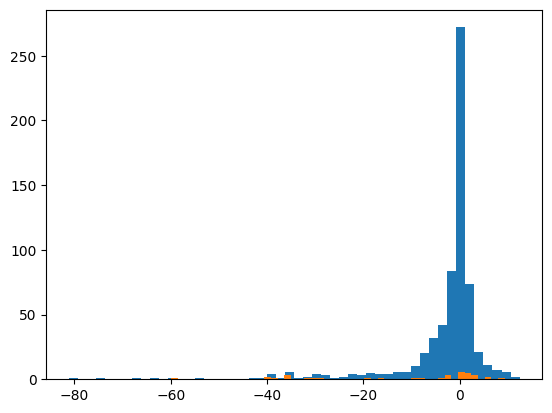

In [12]:
plt.hist( red_combined_df_all_disengagements[ 'steeringPercentage' ], bins = 50 )

plt.hist( red_combined_df_all_disengagements_sliced[ 'steeringPercentage' ], bins = 50 )

plt.show()

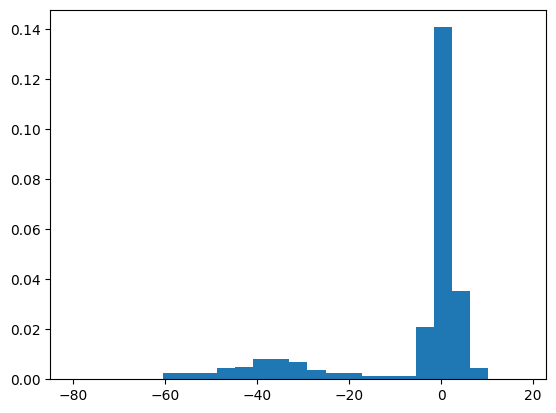

In [13]:
plt.hist( red_combined_df_all_sliced[ 'steeringPercentage' ], bins = 25, density = True )

plt.show()

50
51


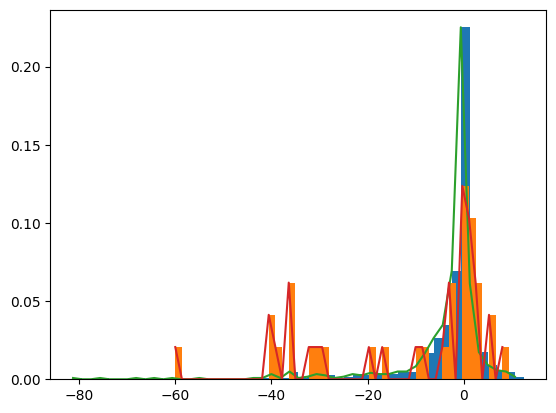

In [14]:
y1, x1, _ = plt.hist(red_combined_df_all_disengagements[ 'steeringPercentage' ], bins = 50, density = True)
y2, x2, _ = plt.hist(red_combined_df_all_disengagements_sliced[ 'steeringPercentage' ], bins = 50, density = True )

plt.plot( x1[ 0 : -1 ], y1 )

plt.plot( x2[ 0 : -1 ], y2 )

print( len( y1 ) )

print( len( x1 ) )

(array([0.73891626, 0.03518649, 0.03518649, 0.        , 0.03518649,
        0.        , 0.        , 0.03518649, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03518649,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03518649, 0.        , 0.        , 0.03518649,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03518649, 0.        , 0.        ,
        0.        , 0.        , 0.03518649, 0.03518649, 0.03518649,
        0.        , 0.        , 0.        , 0.03518649, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07037298]),
 array([ 0.   ,  0.812,  1.624,  2.436,  3.248,  4.06 ,  4.872,  5.684,
         6.496,  7.308,  8.12 ,  8.932,  9.744, 10.556, 11.368, 12.18 ,
        12.992, 13.804, 14.616, 15.428, 16.24 , 17.052, 17.864, 18.676,
        19.488, 20.3  , 21.112, 21.924, 22.736, 23.548, 24.36 , 25.172,
        25.984, 26.796, 27.608

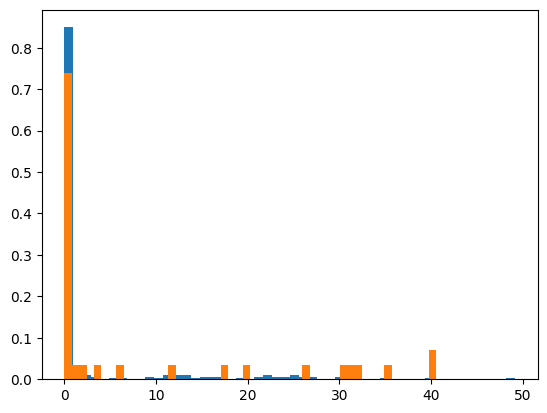

In [15]:
plt.hist(red_combined_df_all_disengagements[ 'brakePercentage' ], bins = 50, density = True, )
plt.hist(red_combined_df_all_disengagements_sliced[ 'brakePercentage' ], bins = 50, density = True )

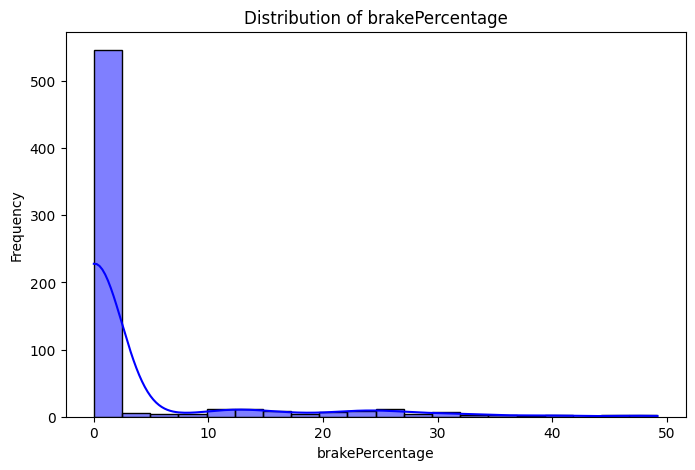

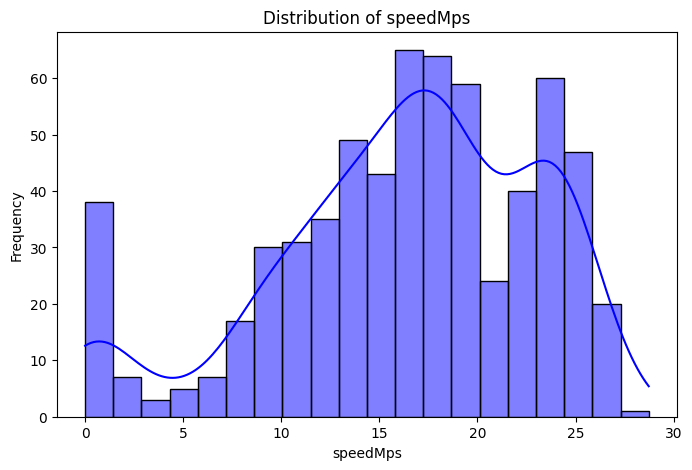

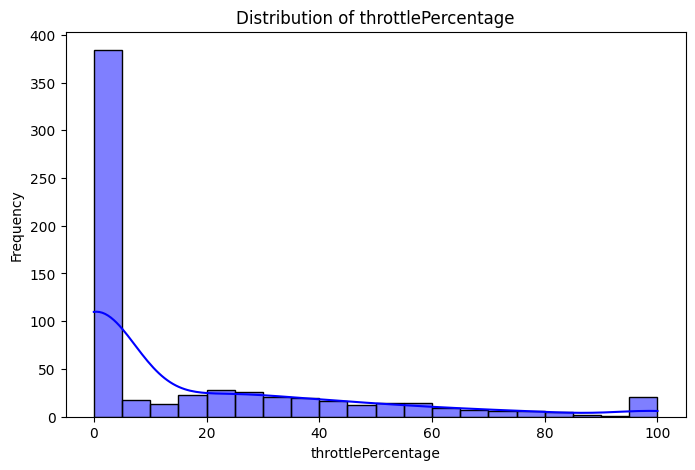

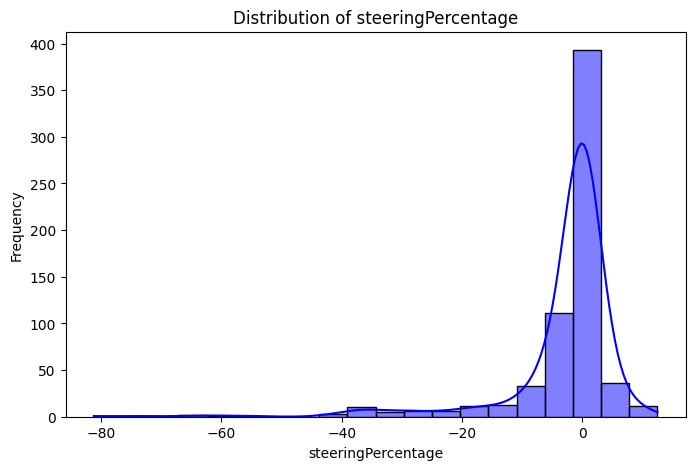

In [16]:
columns = ['brakePercentage', 'speedMps', 'throttlePercentage', 'steeringPercentage']
for column in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(red_combined_df_all_disengagements[column], kde=True, color="blue", bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
red_combined_df_all_disengagements = red_combined_df_all[ red_combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]
red_combined_df_all_disengagements_sliced_1 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.03 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.05 ) ]
red_combined_df_all_disengagements_sliced_2 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.18 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.20 ) ]
red_combined_df_all_disengagements_sliced_3 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.22 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.24 ) ]
red_combined_df_all_disengagements_sliced_4 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.38 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.40 ) ]
red_combined_df_all_disengagements_sliced_5 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.44 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.46 ) ]
red_combined_df_all_disengagements_sliced_6 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.51 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.53 ) ]
red_combined_df_all_disengagements_sliced_7 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.60 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.62 ) ]
red_combined_df_all_disengagements_sliced_8 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.84 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 0.86 ) ]
red_combined_df_all_disengagements_sliced_9 =red_combined_df_all_disengagements[ (red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] > 0.98 ) & 
                                          ( red_combined_df_all_disengagements[ 'ProgressAlongRoute' ] < 1.00 ) ]


In [37]:
# Define the slices as a dictionary
slices = {
    "Slice 1 (0.03-0.05)": red_combined_df_all_disengagements_sliced_1,
    "Slice 2 (0.18-0.20)": red_combined_df_all_disengagements_sliced_2,
    "Slice 3 (0.22-0.24)": red_combined_df_all_disengagements_sliced_3,
    "Slice 4 (0.38-0.40)": red_combined_df_all_disengagements_sliced_4,
    "Slice 5 (0.44-0.46)": red_combined_df_all_disengagements_sliced_5,
    "Slice 6 (0.51-0.53)": red_combined_df_all_disengagements_sliced_6,
    "Slice 7 (0.60-0.62)": red_combined_df_all_disengagements_sliced_7,
    "Slice 8 (0.84-0.86)": red_combined_df_all_disengagements_sliced_8,
    "Slice 9 (0.98-1.00)": red_combined_df_all_disengagements_sliced_9,
    "All Disengaments" : red_combined_df_all_disengagements,
}

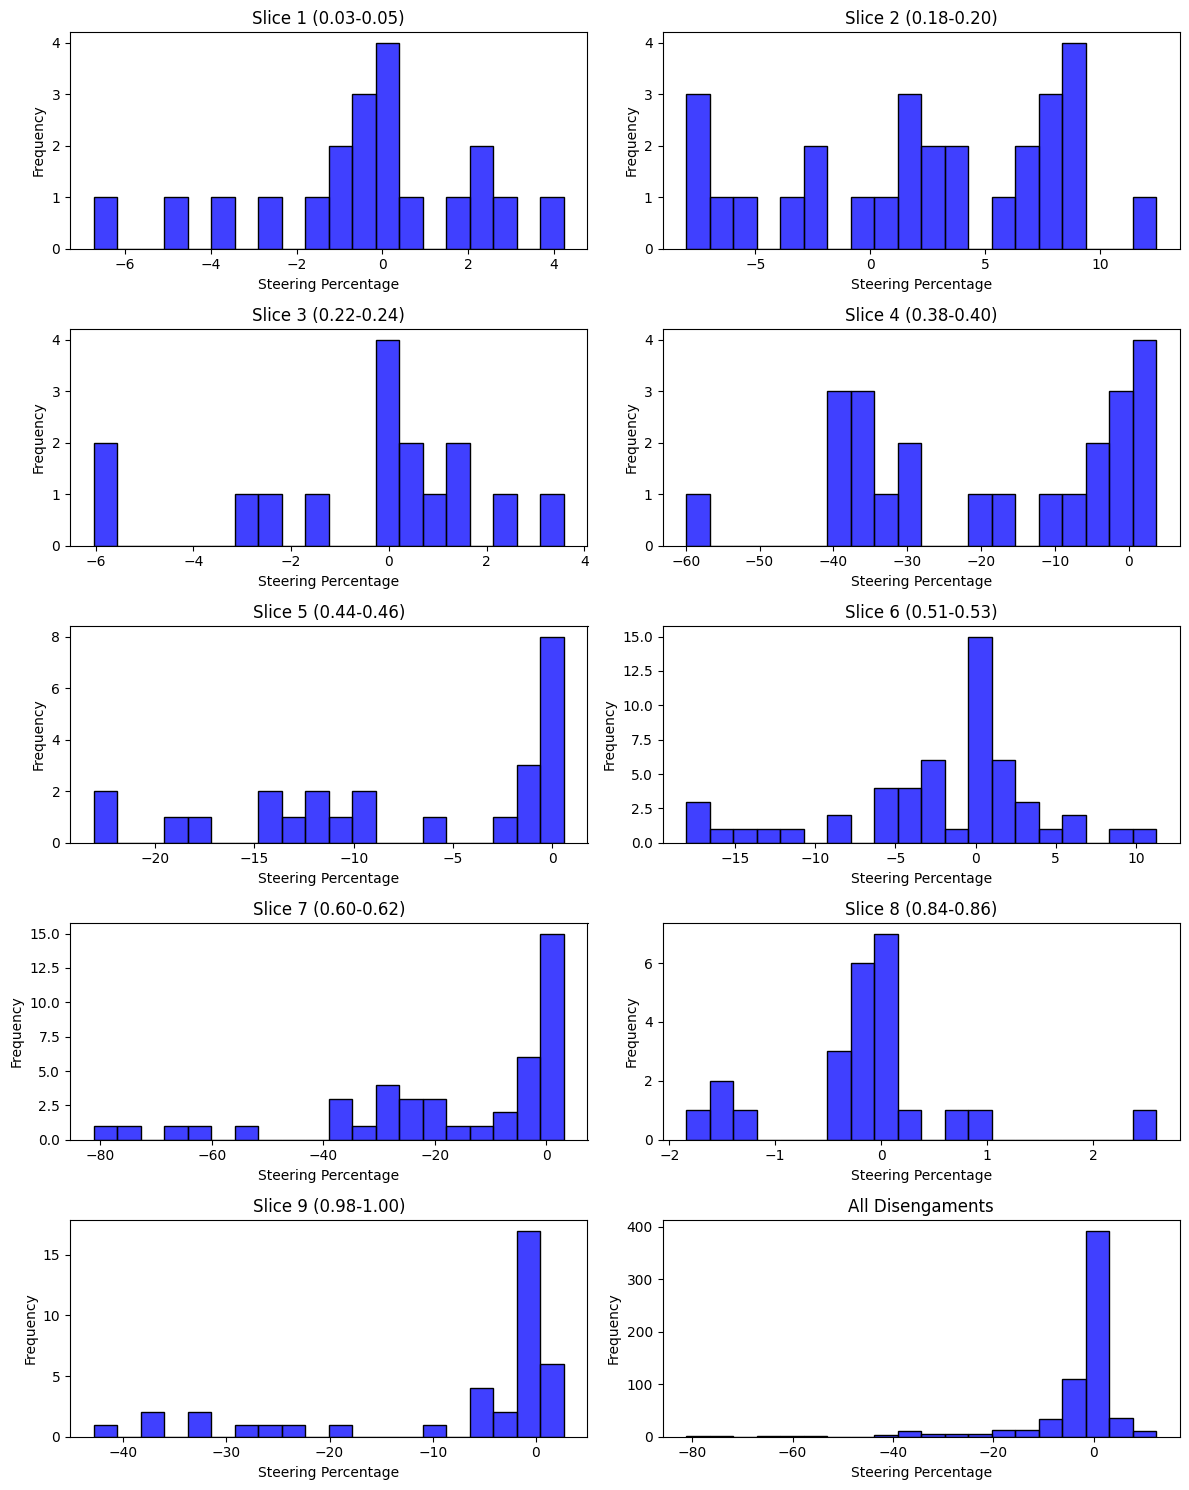

In [19]:
# Set up the figure and axes
fig, axs = plt.subplots(5, 2, figsize=(12, 15))  
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot data for each slice
for i, (title, data) in enumerate(slices.items()):
    sns.histplot(data['steeringPercentage'], bins=20, kde=False, color='blue', ax=axs[i])
    axs[i].set_title(title)
    axs[i].set_xlabel('Steering Percentage')
    axs[i].set_ylabel('Frequency')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

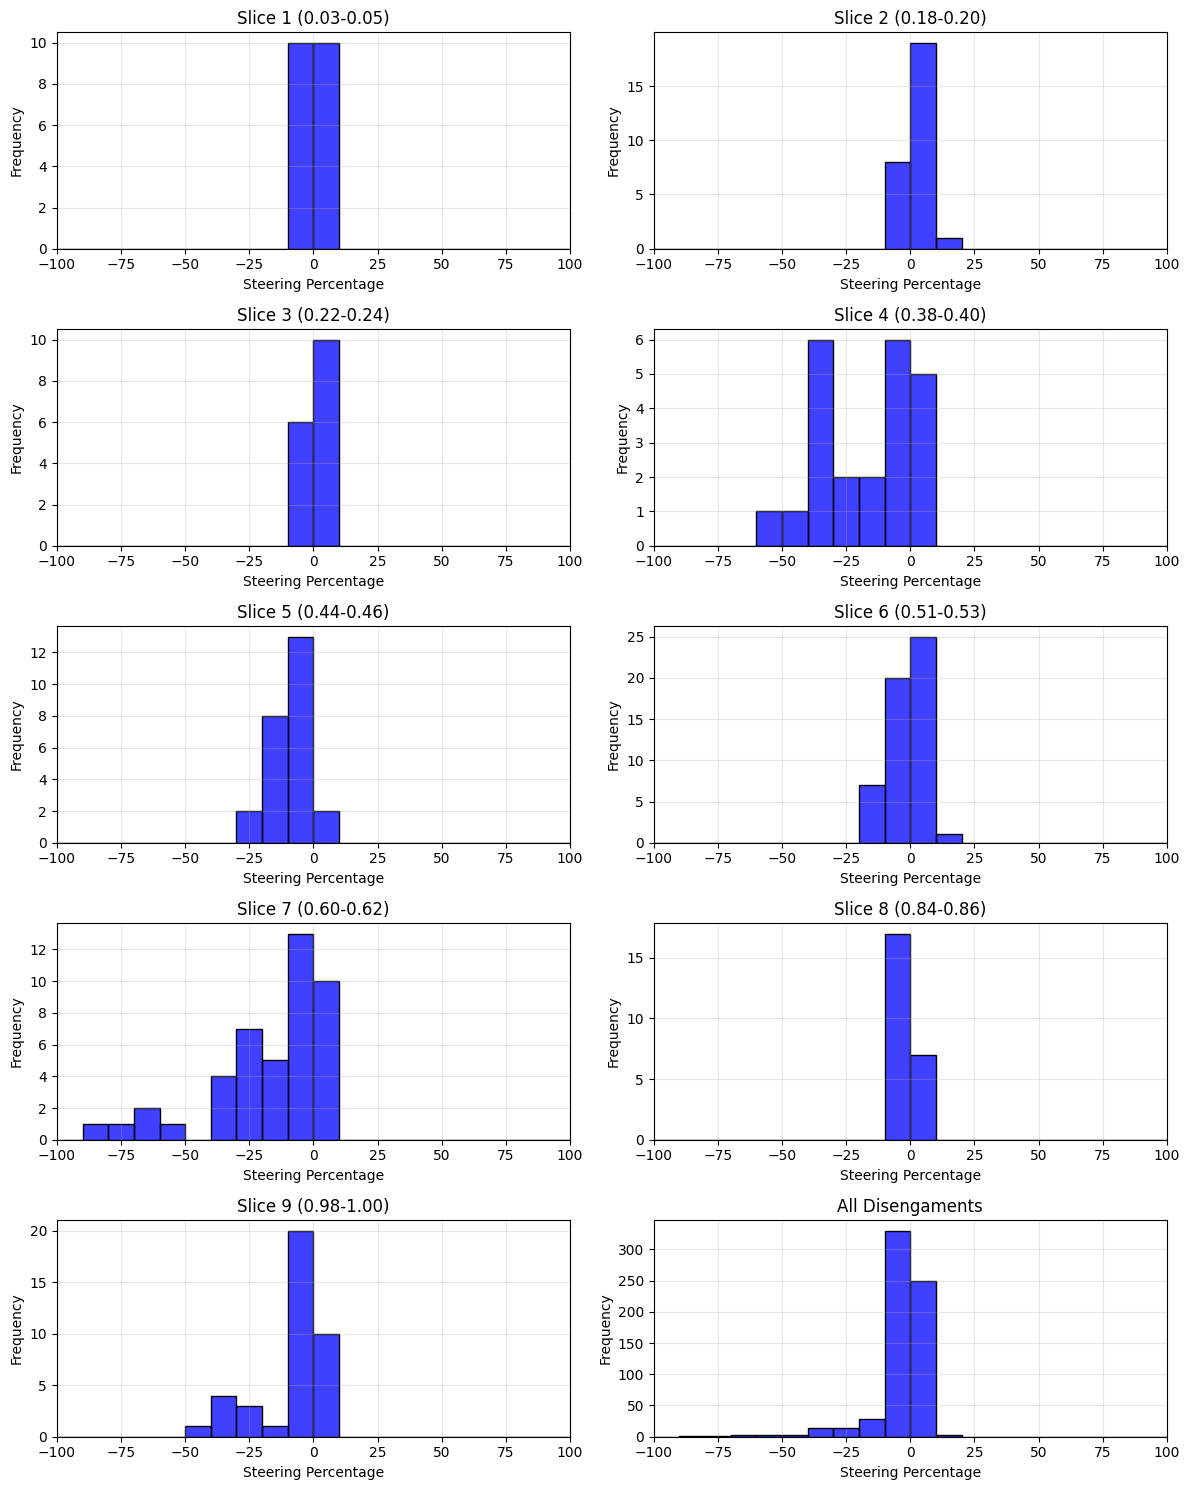

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Compute grid size based on the number of slices
n = len(slices)
cols = 2
rows = math.ceil(n / cols)

# Set up the figure and axes
fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 3))  
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Define consistent bin edges and axis limits
bin_edges = range(-100, 101, 10)  # Example: Steering percentages from -100% to 100% in steps of 10
x_limits = (-100, 100)            # X-axis limits
y_limits = (0, None)              # Y-axis limits (auto-adjust for frequency)

# Plot data for each slice
for i, (title, data) in enumerate(slices.items()):
    sns.histplot(data['steeringPercentage'], bins=bin_edges, kde=False, color='blue', ax=axs[i])
    axs[i].set_title(title)
    axs[i].set_xlabel('Steering Percentage')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(x_limits)  # Set consistent X-axis limits
    axs[i].set_ylim(y_limits)  # Set consistent Y-axis limits
    axs[i].grid(alpha=0.3)

# Hide unused subplots if there are fewer than the total grid size
for ax in axs[len(slices):]:
    ax.set_visible(False)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


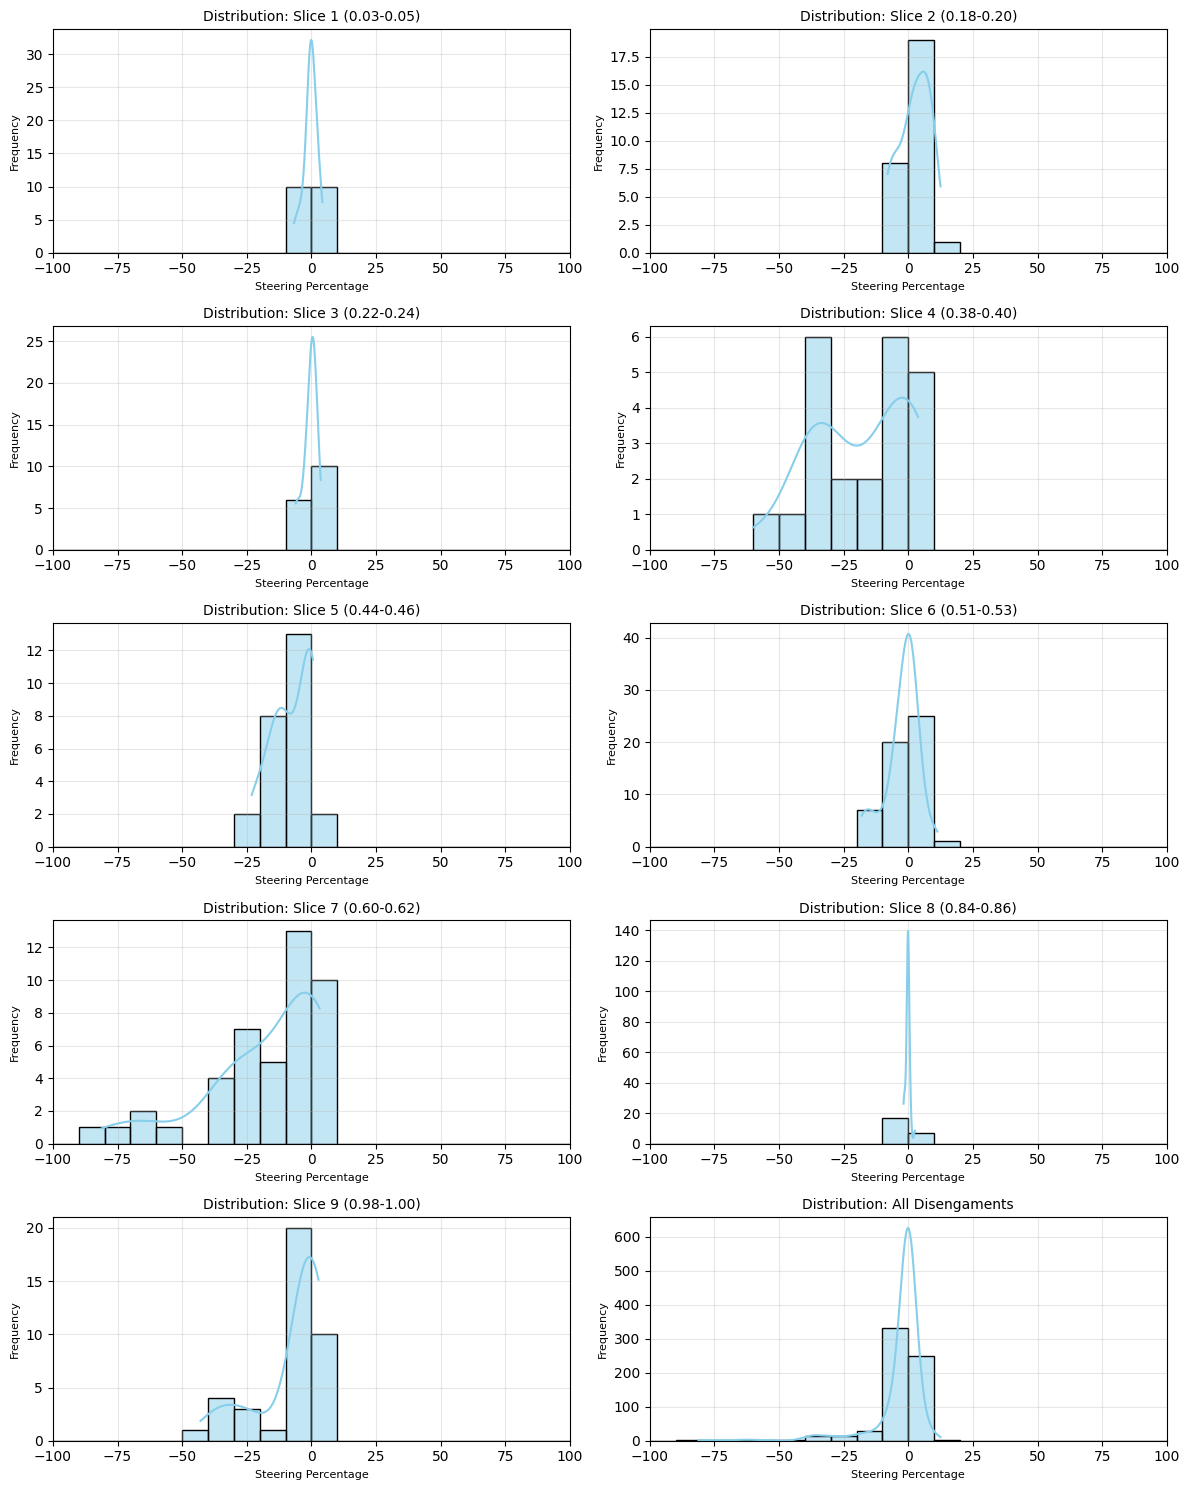

In [20]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Compute grid size
n = len(slices)
cols = 2
rows = math.ceil(n / cols)

# Set up figure and axes
fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 3))
axs = axs.flatten()

# Define consistent bin edges and axis limits
bin_edges = range(-100, 101, 10)  # Example: Steering percentages from -100% to 100% in steps of 10
x_limits = (-100, 100)            # X-axis limits
y_limits = (0, None)              # Y-axis limits (auto-adjust for frequency)

# Plot data for each slice
for i, (title, data) in enumerate(slices.items()):
    sns.histplot(data['steeringPercentage'], bins=bin_edges, kde=True, color='skyblue', ax=axs[i])
    axs[i].set_title(f"Distribution: {title}", fontsize=10)
    axs[i].set_xlabel('Steering Percentage', fontsize=8)
    axs[i].set_ylabel('Frequency', fontsize=8)
    axs[i].set_xlim(x_limits)  # Set X-axis limits
    axs[i].set_ylim(y_limits)  # Set Y-axis limits (optional)
    axs[i].grid(alpha=0.3)

# Hide unused subplots
for ax in axs[len(slices):]:
    ax.set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()


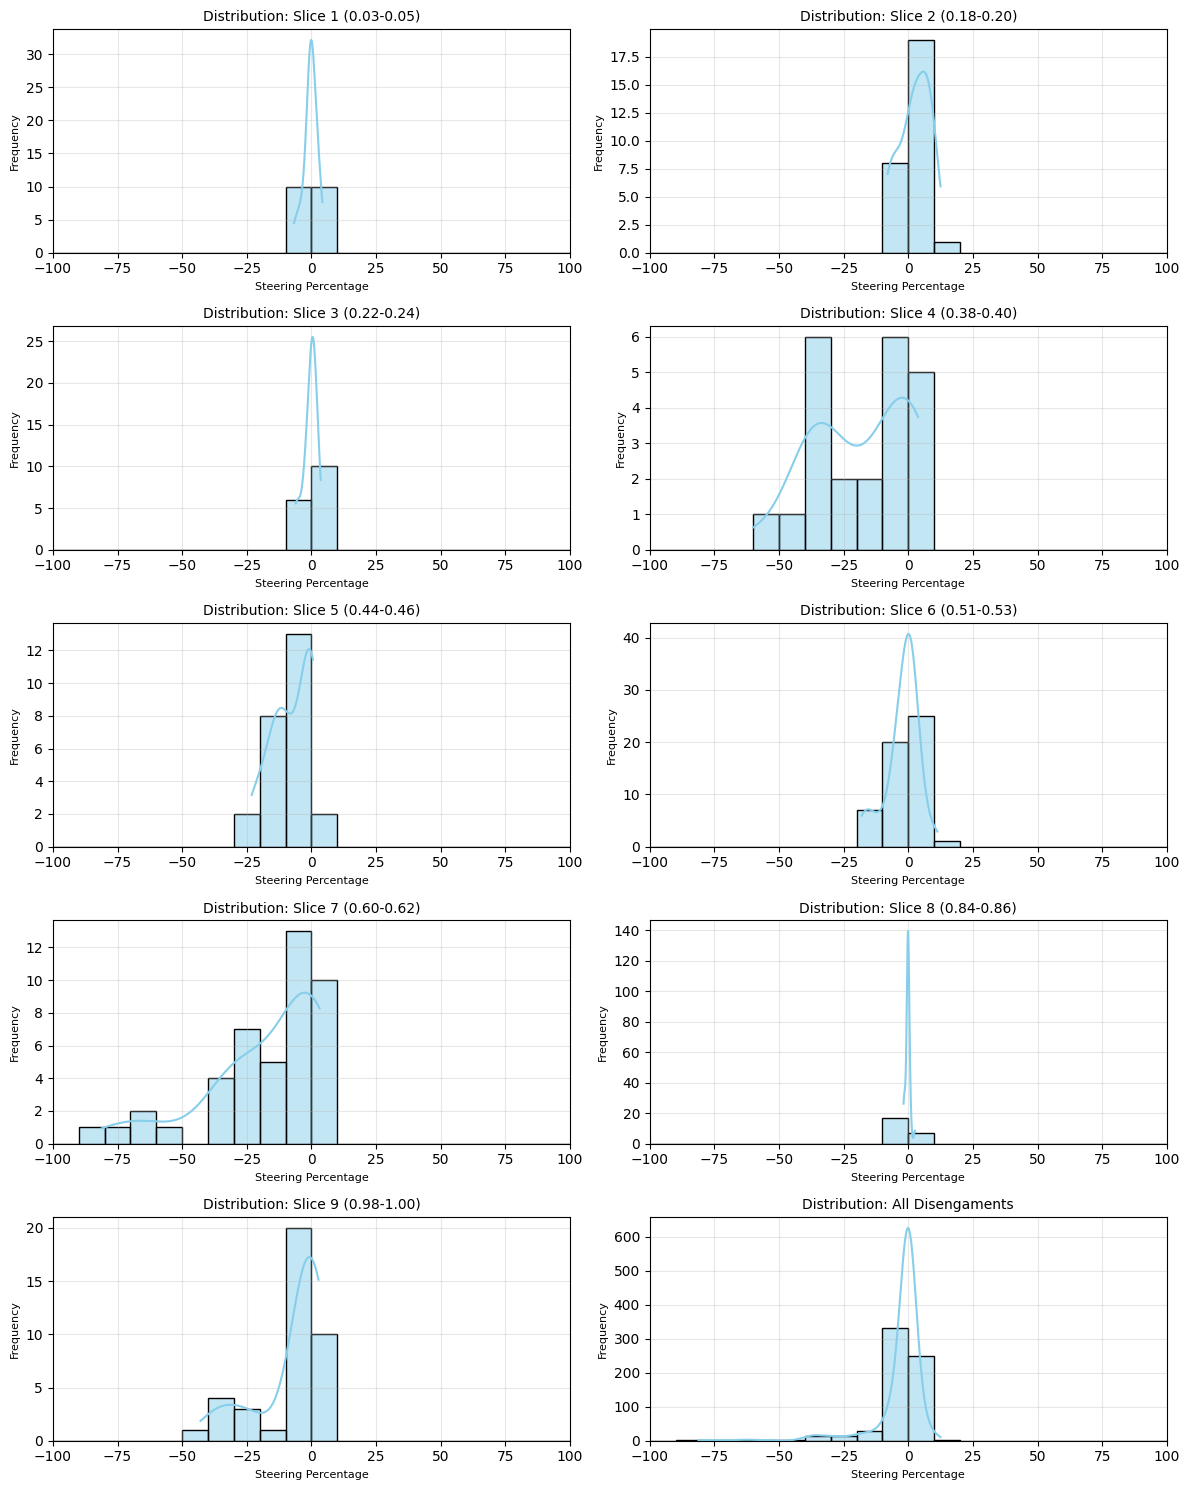

In [34]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Compute grid size
n = len(slices)
cols = 2
rows = math.ceil(n / cols)

# Set up figure and axes
fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 3))
axs = axs.flatten()

# Define consistent bin edges and axis limits
bin_edges = range(-100, 101, 10)  # Example: Steering percentages from -100% to 100% in steps of 10
x_limits = (-100, 100)            # X-axis limits
y_limits = (0,None)                # Set Y-axis limits to a fixed range for consistency (adjust as necessary)

# Plot data for each slice
for i, (title, data) in enumerate(slices.items()):
    sns.histplot(data['steeringPercentage'], bins=bin_edges, kde=True, color='skyblue', ax=axs[i])
    axs[i].set_title(f"Distribution: {title}", fontsize=10)
    axs[i].set_xlabel('Steering Percentage', fontsize=8)
    axs[i].set_ylabel('Frequency', fontsize=8)
    axs[i].set_xlim(x_limits)  # Set X-axis limits
    axs[i].set_ylim(y_limits)  # Set Y-axis limits (same for all plots)
    axs[i].grid(alpha=0.3)

# Hide unused subplots
for ax in axs[len(slices):]:
    ax.set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()


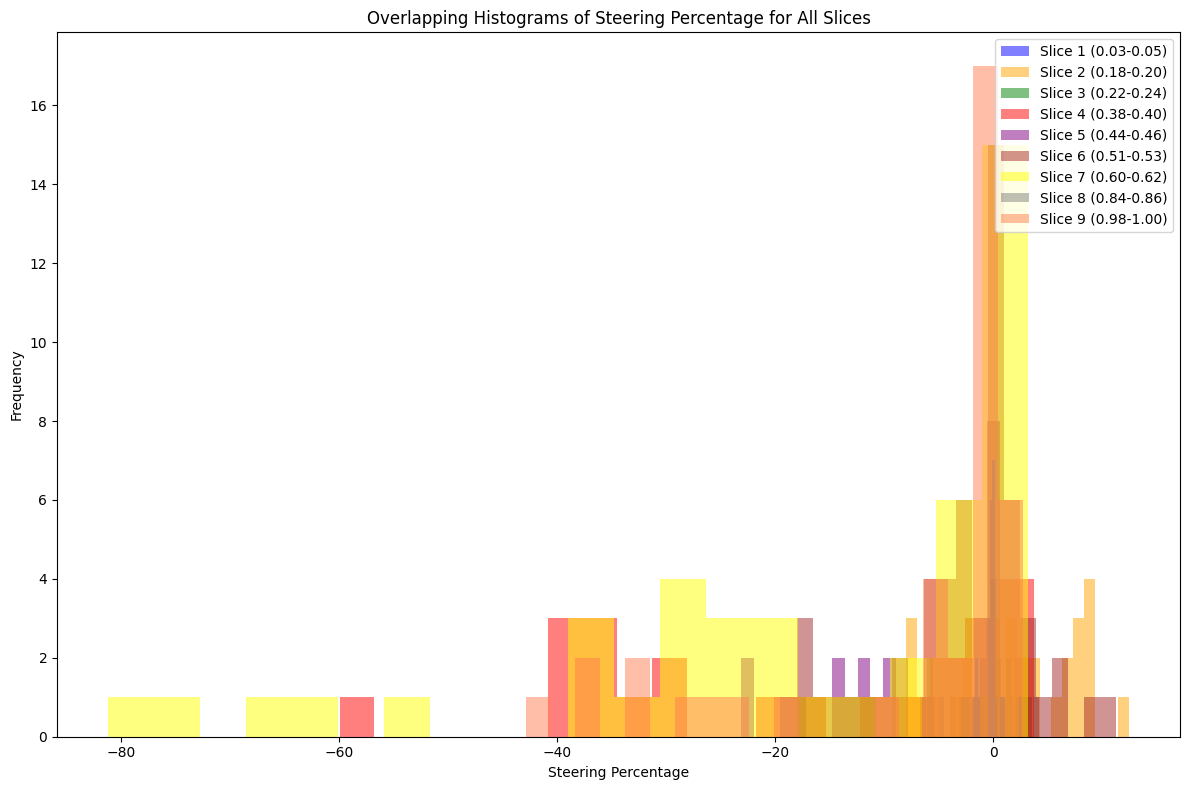

In [21]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Define colors for each slice
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'yellow', 'grey','coral']

# Plot histograms for each slice
for color, (label, data) in zip(colors, slices.items()):
    plt.hist(
        data['steeringPercentage'], bins=20, alpha=0.5, label=label, color=color
    )

# Add legend, labels, and title
plt.legend(loc='upper right')
plt.xlabel('Steering Percentage')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Steering Percentage for All Slices')

# Display the plot
plt.tight_layout()
plt.show()


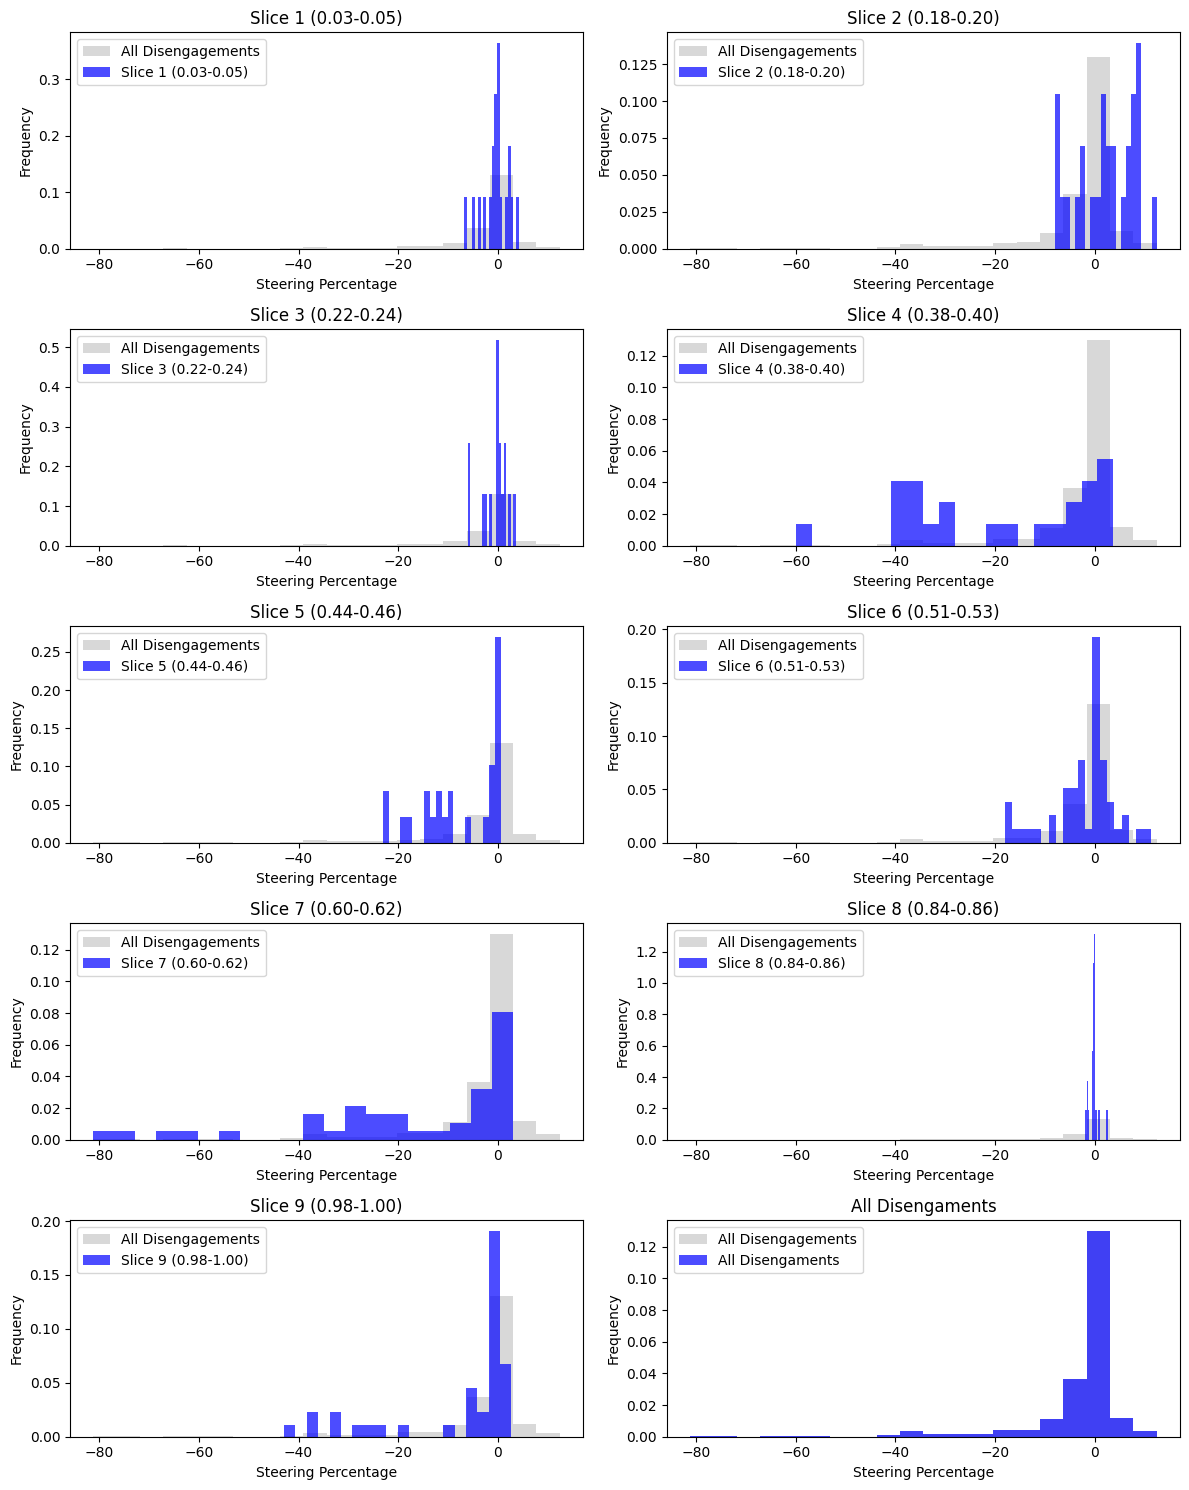

In [22]:
# Set up the figure and axes
fig, axs = plt.subplots(5, 2, figsize=(12, 15))  # 3 rows, 2 columns of subplots
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot histograms for each slice on their respective subplots
for i, (title, data) in enumerate(slices.items()):
    # Overall data histogram
    axs[i].hist(
        red_combined_df_all_disengagements['steeringPercentage'], 
        bins=20, alpha=0.3, color='gray', density = True, label='All Disengagements'
    )
    # Slice-specific histogram
    axs[i].hist(
        data['steeringPercentage'], 
        bins=20, alpha=0.7, color='blue',density = True, label=title
    )
    axs[i].set_title(title)
    axs[i].set_xlabel('Steering Percentage')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Hide unused subplots (if any)
for j in range(len(slices), len(axs)):
    axs[j].axis('off')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


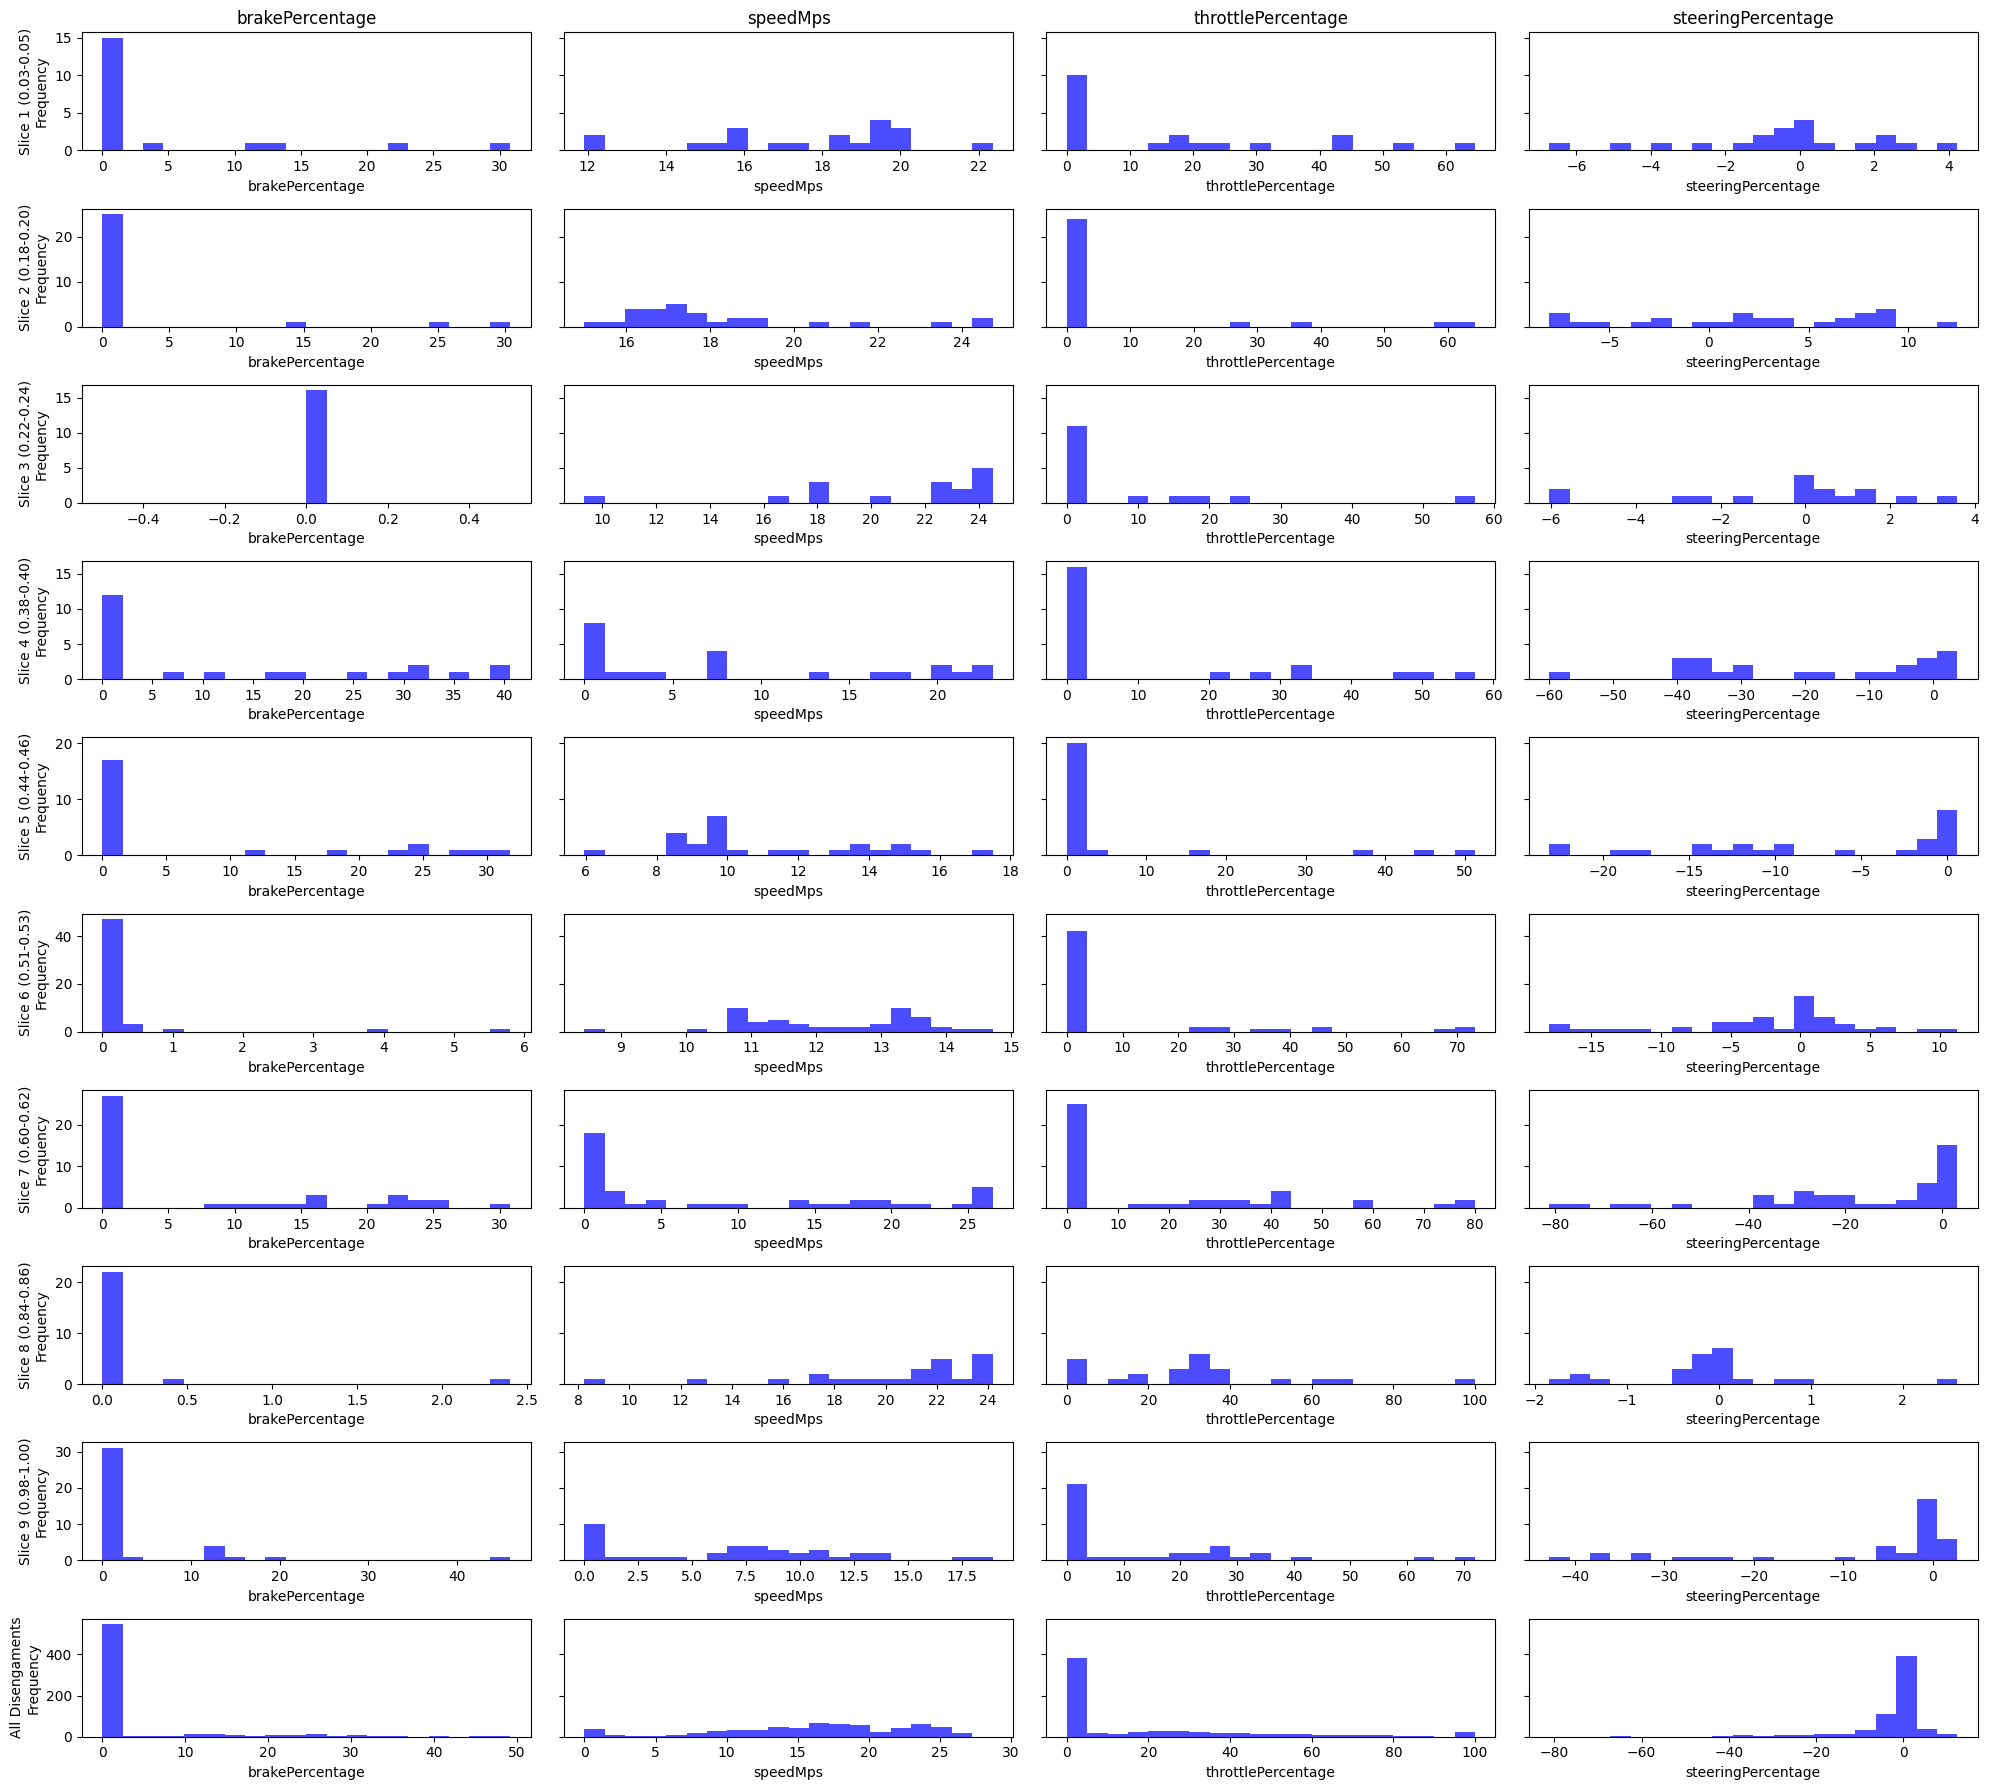

In [23]:
columns = ['brakePercentage', 'speedMps', 'throttlePercentage', 'steeringPercentage']

# Set up the figure and axes
fig, axs = plt.subplots(len(slices), len(columns), figsize=(20, 18), sharey='row')
axs = axs.reshape(len(slices), len(columns))  # Ensure correct shape

# Plot histograms for each variable in each slice
for row_idx, (title, data) in enumerate(slices.items()):
    for col_idx, column in enumerate(columns):
        axs[row_idx, col_idx].hist(data[column], bins=20, alpha=0.7, color='blue')
        if row_idx == 0:  # Set column titles
            axs[row_idx, col_idx].set_title(column)
        if col_idx == 0:  # Set row titles
            axs[row_idx, col_idx].set_ylabel(f"{title}\nFrequency")
        axs[row_idx, col_idx].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


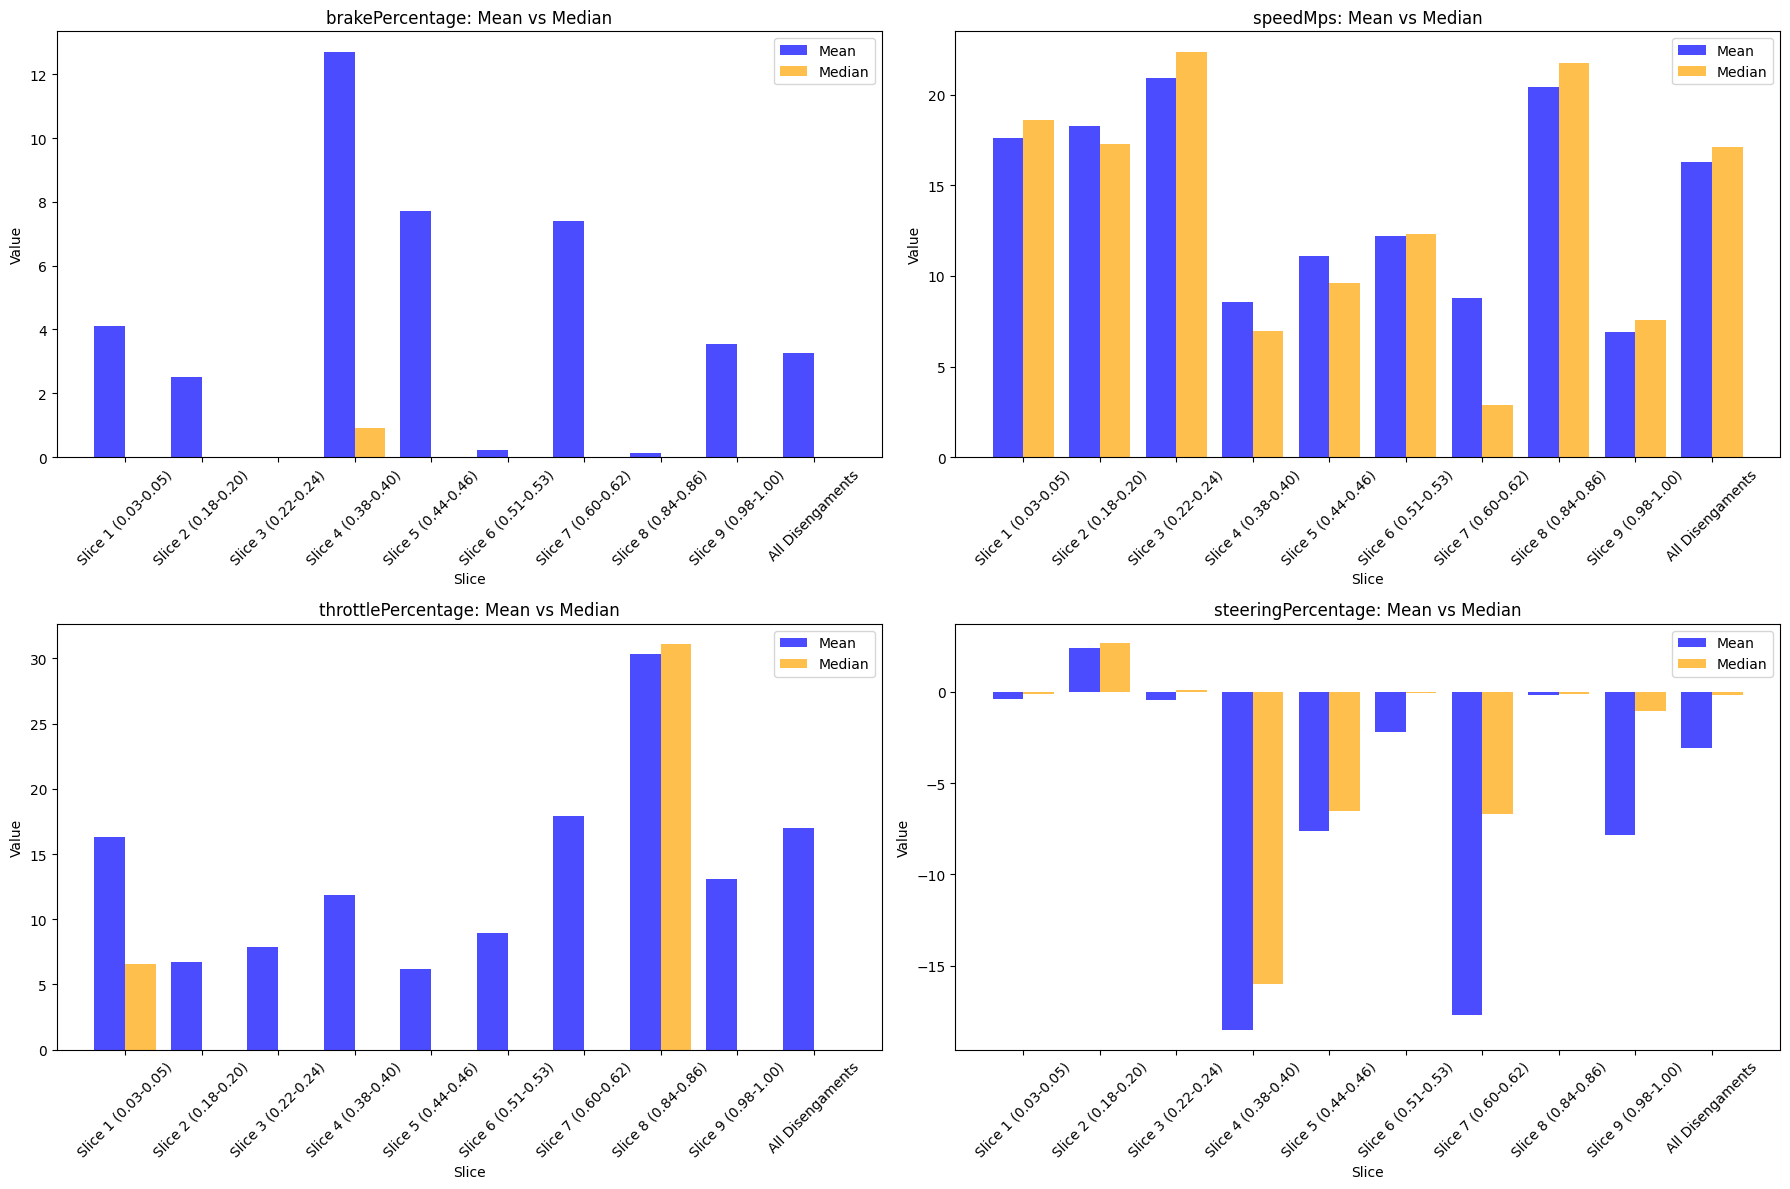

In [24]:
# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # 2x2 grid for the four variables
axs = axs.flatten()

# Bar plot for each variable
x = np.arange(len(slices))  # Position for groups of bars
width = 0.4  # Width of each bar

for i, column in enumerate(columns):
    # Calculate means and medians for each slice
    means = [data[column].mean() for data in slices.values()]
    medians = [data[column].median() for data in slices.values()]
    
    # Plot mean and median as grouped bars
    axs[i].bar(x - width / 2, means, width, label='Mean', color='blue', alpha=0.7)
    axs[i].bar(x + width / 2, medians, width, label='Median', color='orange', alpha=0.7)
    
    # Set titles and labels
    axs[i].set_title(f"{column}: Mean vs Median")
    axs[i].set_ylabel("Value")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(slices.keys(), rotation=45)  # Rotate slice labels for clarity
    axs[i].set_xlabel("Slice")
    axs[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

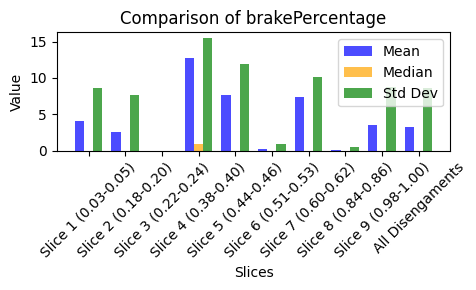

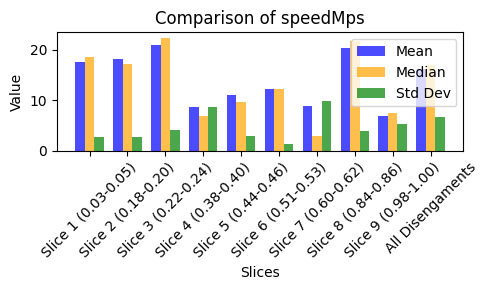

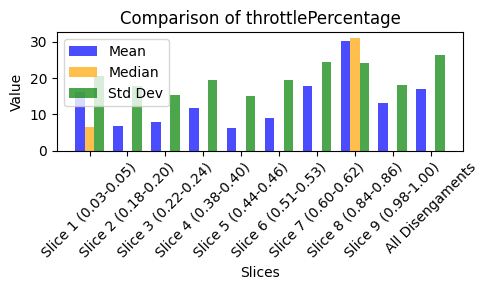

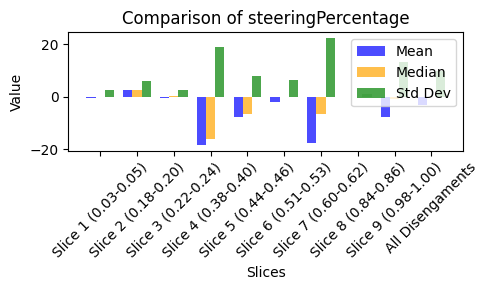

In [25]:
columns = ['brakePercentage', 'speedMps', 'throttlePercentage', 'steeringPercentage']
stats = ['mean', 'median', 'std']

for column in columns:
    means = [data[column].mean() for data in slices.values()]
    medians = [data[column].median() for data in slices.values()]
    stds = [data[column].std() for data in slices.values()]

    x = np.arange(len(slices))
    width = 0.25

    plt.figure(figsize=(5,3))
    plt.bar(x - width, means, width, label='Mean', color='blue', alpha=0.7)
    plt.bar(x, medians, width, label='Median', color='orange', alpha=0.7)
    plt.bar(x + width, stds, width, label='Std Dev', color='green', alpha=0.7)

    plt.title(f"Comparison of {column}")
    plt.xlabel("Slices")
    plt.ylabel("Value")
    plt.xticks(x, slices.keys(), rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


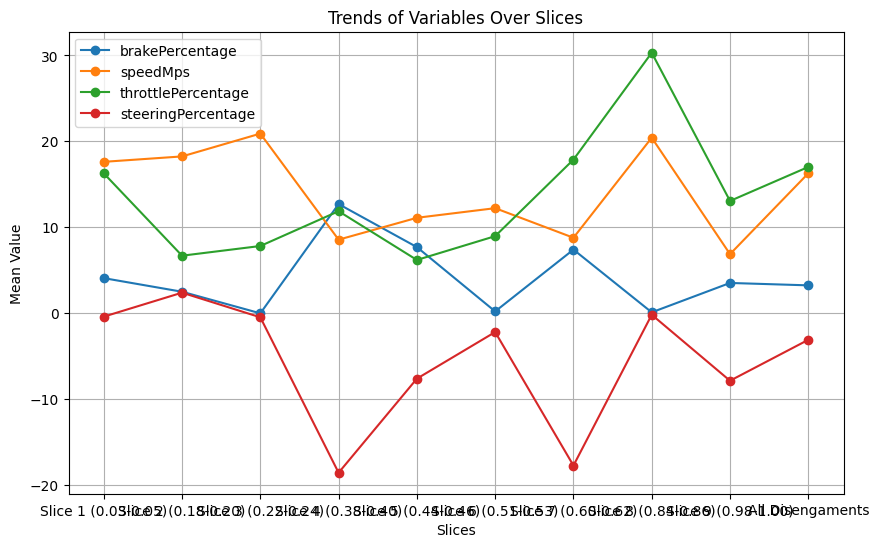

In [26]:
means = {column: [data[column].mean() for data in slices.values()] for column in columns}

plt.figure(figsize=(10, 6))
for column, values in means.items():
    plt.plot(slices.keys(), values, marker='o', label=column)

plt.title("Trends of Variables Over Slices")
plt.xlabel("Slices")
plt.ylabel("Mean Value")
plt.legend()
plt.grid()
plt.show()

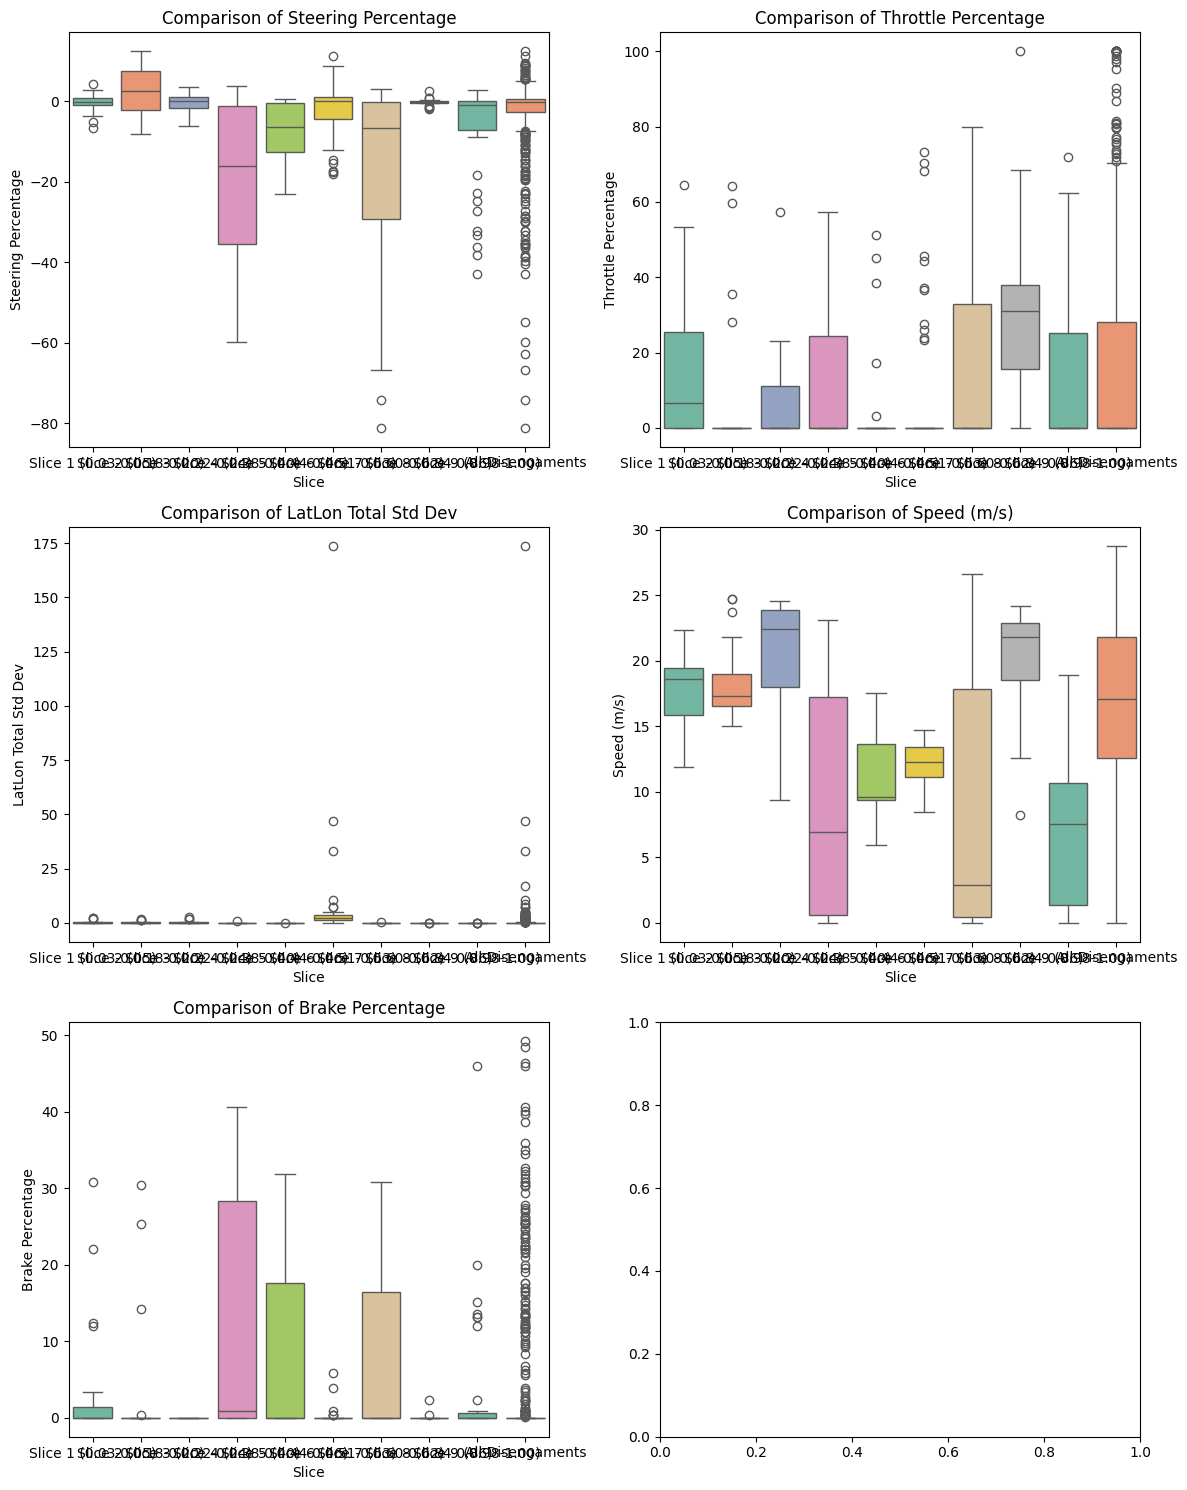

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define features for comparison
features = ['steeringPercentage', 'throttlePercentage', 'LatLonTotalStdDev', 'speedMps', 'brakePercentage']
titles = ['Steering Percentage', 'Throttle Percentage', 'LatLon Total Std Dev', 'Speed (m/s)', 'Brake Percentage']

# Set up the figure and axes (one plot for each feature)
fig, axs = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 columns for 5 plots
axs = axs.flatten()  # Flatten for easier indexing

# Combine all slices into a single DataFrame with a 'Slice' column
combined_data = pd.DataFrame()

# Add the 'Slice' information to each slice
for slice_name, slice_data in slices.items():
    slice_data['Slice'] = slice_name  # Add a 'Slice' column for identifying data
    combined_data = pd.concat([combined_data, slice_data])

# Plot each feature in its respective subplot
for i, feature in enumerate(features):
    sns.boxplot(x='Slice', y=feature, data=combined_data, ax=axs[i], palette='Set2')
    axs[i].set_title(f'Comparison of {titles[i]}')
    axs[i].set_xlabel('Slice')
    axs[i].set_ylabel(titles[i])

# Adjust layout for clarity
plt.tight_layout()
plt.show()
